In [23]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib_inline import backend_inline
backend_inline.set_matplotlib_formats('svg')
import seaborn as sns

## Read the data

In [2]:
columns=['Id','RI','Na','Mg','Al','Si','K','Ca','Ba','Fe','Type']
glass_type=pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Glass%20Identification/Glass%20Identification.csv",
                       header=None)
glass_type.columns=columns
glass_type

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [3]:
glass_type['Type_bin']=np.where(glass_type.Type<5,0,1)
glass_type

,Id,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type,Type_bin
0,1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1,0
1,2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1,0
2,3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1,0
3,4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1,0
4,5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
209,210,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7,1
210,211,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7,1
211,212,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7,1
212,213,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7,1


## EDA

In [4]:
glass_type.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        214 non-null    int64  
 1   RI        214 non-null    float64
 2   Na        214 non-null    float64
 3   Mg        214 non-null    float64
 4   Al        214 non-null    float64
 5   Si        214 non-null    float64
 6   K         214 non-null    float64
 7   Ca        214 non-null    float64
 8   Ba        214 non-null    float64
 9   Fe        214 non-null    float64
 10  Type      214 non-null    int64  
 11  Type_bin  214 non-null    int32  
dtypes: float64(9), int32(1), int64(2)
memory usage: 19.4 KB


In [5]:
glass_type.drop(columns=['Id','Type'],inplace=True)
glass_type

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_bin
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,0
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,0
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,0
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,0
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,0
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,1
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,1
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,1
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,1


In [6]:
glass_type_eda=glass_type.copy()
glass_type_eda['Type_text']=np.where(glass_type_eda.Type_bin==0,'Window Glass','Non-Window Glass')
glass_type_eda.drop(columns=['Type_bin'],inplace=True)
glass_type_eda

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type_text
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,Window Glass
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,Window Glass
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,Window Glass
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,Window Glass
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,Window Glass
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,Non-Window Glass
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,Non-Window Glass
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,Non-Window Glass
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,Non-Window Glass


In [7]:
glass_type_eda.Type_text.value_counts(normalize=True)

Type_text
Window Glass        0.761682
Non-Window Glass    0.238318
Name: proportion, dtype: float64

### Univariate Analysis

In [9]:
glass_type_eda.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000


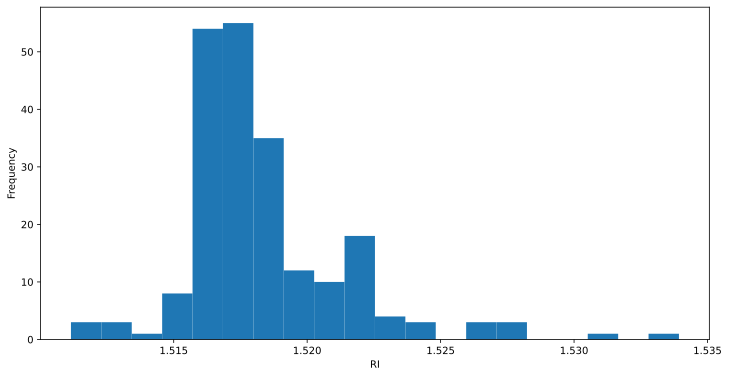

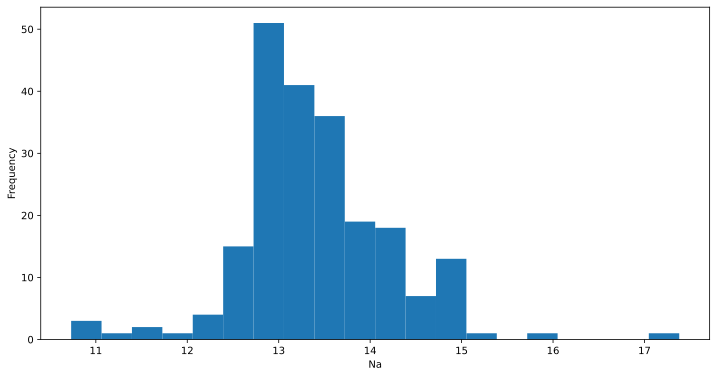

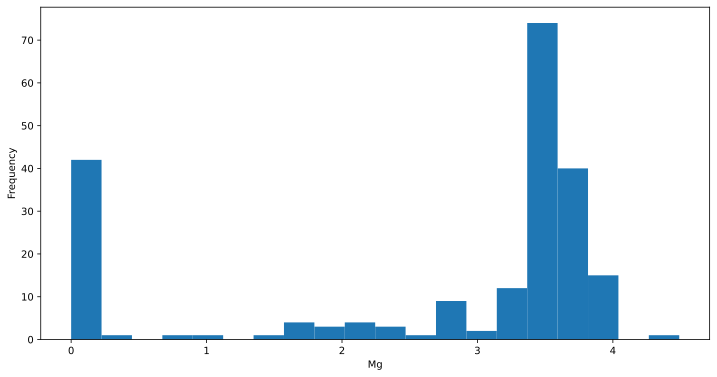

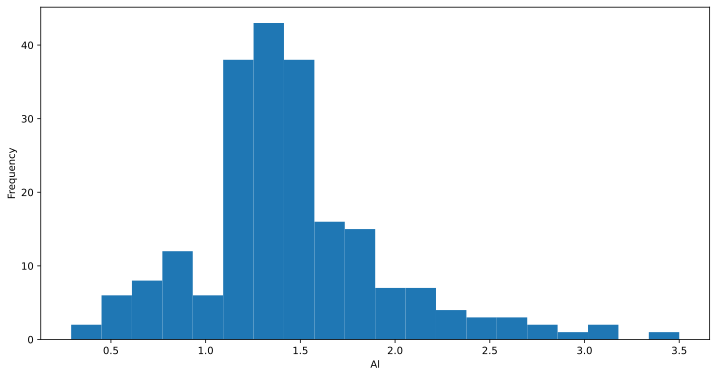

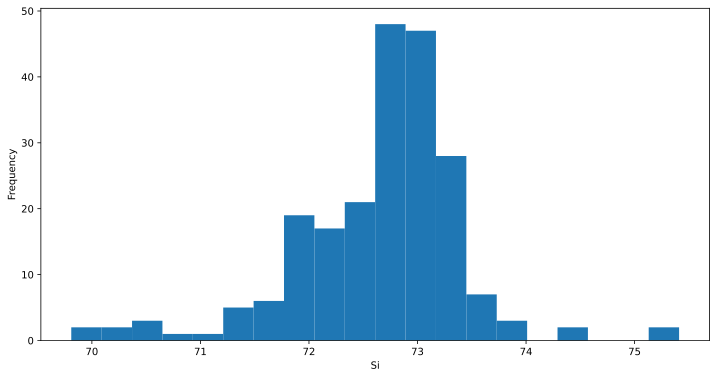

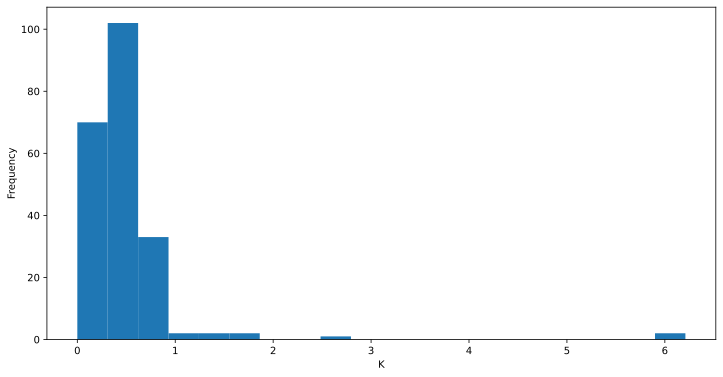

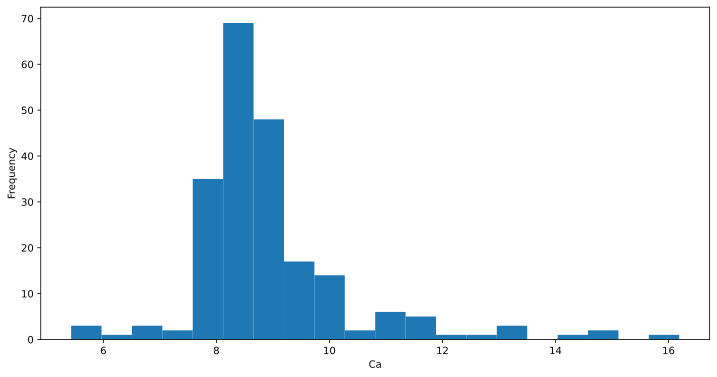

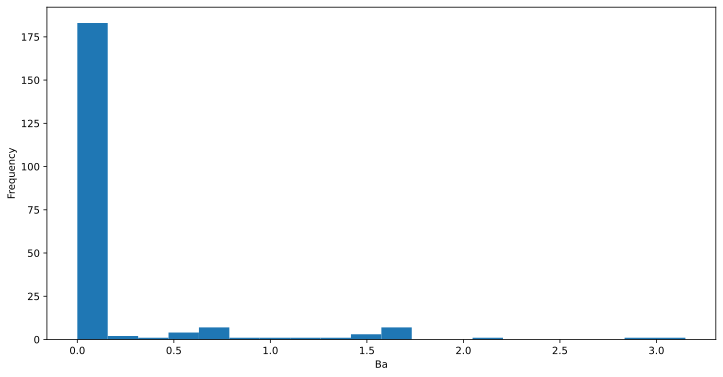

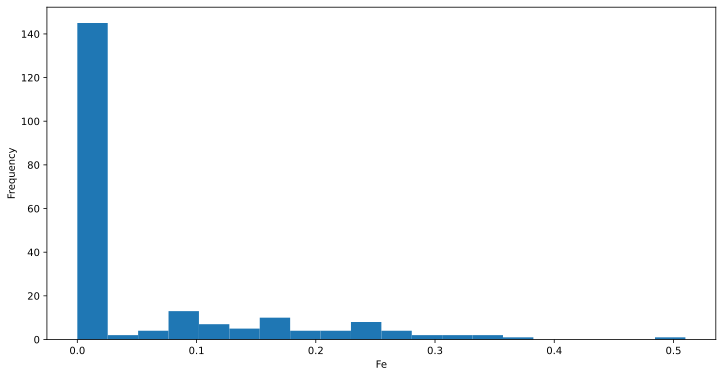

In [26]:
for col in glass_type_eda.iloc[:,:-1].columns.values:
    plt.figure(figsize=(12,6))
    glass_type_eda[col].plot.hist(bins=20)
    plt.xlabel(col)
    plt.show()

### Bivariate Analysis